# Análise das Marcas de Carros Mais Vendidas em 2010
### Autor: **Rafael Alves dos Santos**
### Curso: **Banco de Dados — Inteligência Analítica**
### Linguagem de Programação: **Python**
### Bibliotecas Usadas: **Pandas, Numpy, Matplotlib, Seaborn**

---

## 📘 Sobre o Projeto
Este projeto realiza uma **Análise Exploratória de Dados (EDA)** utilizando o dataset **`car_prices.csv`**.

O objetivo principal é:

-  Identificar as **marcas de carros mais vendidas em 2010**  
-   Analisar quais **tipos de carroceria (body)** foram mais vendidos **pela Ford em 2010**

O projeto demonstra habilidades em:
- Limpeza e filtragem de dados  
- Manipulação e agrupamento com Pandas  
- Visualização de dados com Matplotlib e Seaborn  
- Construção de gráficos e análise exploratória  

---




make
Ford         3534
Chevrolet    3347
Dodge        2421
Toyota       1991
Honda        1313
Name: count, dtype: int64


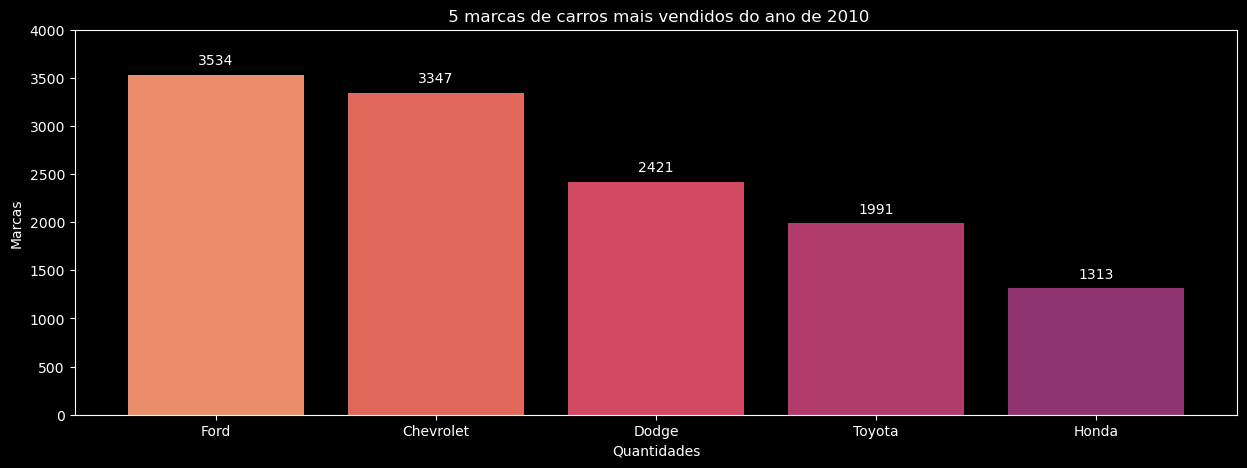

C:\Users\Administrator\AppData\Local\Temp\ipykernel_13500\2035458011.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ford_2010["body"] = [b.title() for b in df_ford_2010['body']]


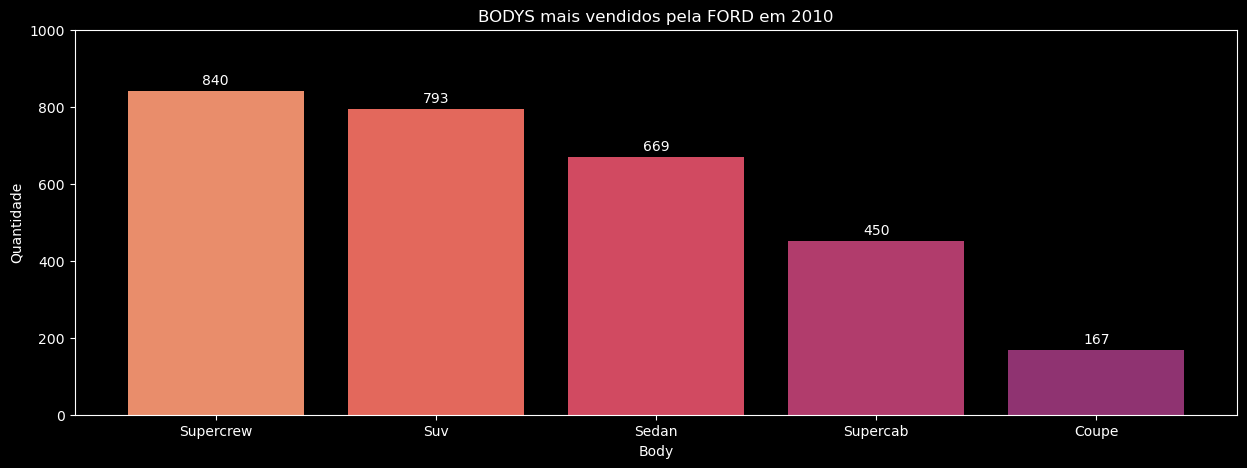

In [1]:
# 1° passo importar bibliotescas (não vamos ter que inventar a Roda ! )

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

plt.style.use('dark_background')

# 2° passo: carregar dados (abrir o arquivo)

df = pd.read_csv("car_prices.csv").copy().dropna() # o copy é para fazermos uma copia evitando de auterar o arquivo original !

#.dropna() para tirarmos os dados NaN (dados não presentes)

# 3° passo: criar um filtro para pergamos carros do ano de 2010, irei ultilizar o lambda

df_2010 = df.loc[lambda t:t["year"] == 2010]



## Top 5 marcas vendidas em 2010

##Nesta etapa removo colunas desnecessárias e conto quais marcas mais aparecem no dataset.

#removendo colunas desnessesarias para a nossa analíse.

df_2010 = df_2010.drop(columns = ['trim', 'transmission' , 'vin' , 'state' , 'condition', 'odometer', 'color', 'interior',
                                  'mmr', 'saledate' , 'sellingprice'])

df_2010 = df_2010['make']

top_marcas = df_2010.value_counts().head()

marcas = [v for v in top_marcas.index.tolist()]
valores = top_marcas.values

print(top_marcas)

# criar graficos

fig,ax = plt.subplots(figsize = (15,5))
g = ax.bar(marcas, valores ,color=sns.color_palette("flare"))
           
ax.set(
    title = " 5 marcas de carros mais vendidos do ano de 2010",
    xlabel = "Quantidades",
    ylabel = "Marcas",
    ylim = (0,4000)
)
ax.bar_label(g, padding = 5 , fmt = '%d')
plt.show()


## Carrocerias (body types) mais vendidas pela Ford em 2010
#Agora analiso apenas os veículos da marca Ford.

df_ford =df [["make", 'body' , 'year' ]].loc[lambda t: t["make"] == 'Ford']
df_ford_2010 = df_ford.loc[lambda t: t ["year"] == 2010]

df_ford_2010["body"] = [b.title() for b in df_ford_2010['body']]
top_bodys = df_ford_2010.value_counts().head()

bodys = [i[1] for i in top_bodys.index]
quantidade = top_bodys.values


fig, ax =  plt.subplots(figsize = (15,5))
g = ax.bar(bodys , quantidade , color = sns.color_palette("flare"))
ax.set(
    title = "BODYS mais vendidos pela FORD em 2010",
    ylabel = "Quantidade",
    xlabel = "Body",
    ylim = (0,1000)
)

ax.bar_label(g,padding = 3 )
plt.show()